# Data & Things (RUC F2023)

## Hand-in Exercises for Exam


## 0. Loading of common modules or initialization of other common things, if any

In [ ]:
import os

!git clone https://github.com/joelgrus/data-science-from-scratch.git

os.rename("data-science-from-scratch", "data_science")

Cloning into 'data-science-from-scratch'...
remote: Enumerating objects: 392, done.
remote: Total 392 (delta 0), reused 0 (delta 0), pack-reused 392
Receiving objects: 100% (392/392), 782.45 KiB | 1.59 MiB/s, done.
Resolving deltas: 100% (194/194), done.


In [ ]:
!pip install paho-mqtt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62135 sha256=8afd72b11fb4b3666c9b9b6813890bb39806692ad6418c788ed1a0f48dc69db9
  Stored in directory: /root/.cache/pip/wheels/0f/90/29/db29bb8ddc98ec5f2363b959130c9ddbcf5cfdb4a00b6184dd
Successfully built paho-mqtt


In [ ]:
# Importing the ploting module from matplotlib
from matplotlib import pyplot as plt
from data_science.scratch.linear_algebra import dot
import pandas as pd
import seaborn as sns
from scipy import stats
import math
import time
from data_science.scratch.linear_algebra import sum_of_squares
from typing import List
import numpy as np

# Import Science-Kit
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_curve, roc_auc_score, silhouette_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Import SciPy
from scipy.cluster.hierarchy import dendrogram, linkage

# Import MQTT
import paho.mqtt.client as mqtt

# Import StatsModels
import statsmodels.tsa.api as smt
import statsmodels.api as sm

# Import Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# key-value pairs
import dbm
import os

# MapReduce
from multiprocessing import Pool
import HashtagCountMR as htcmr
import time


In [ ]:


def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
  # Translate xs by subtracting its mean (so the result has mean 0)
  x_bar = mean(xs)
  return [x - x_bar for x in xs]


def covariance(xs: List[float], ys: List[float]) -> float:
  assert len(xs) == len(ys) # xs and ys must have the same number of elements

  return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

def correlation(xs: List[float], ys: List[float]) -> float:
  # Measures how much xs and ys vary in tandem about their means
  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)
  if (stdev_x > 0 and stdev_y > 0):
    return covariance(xs, ys) / stdev_x / stdev_y
  else:
    return 0 # if no variation, correlation is zero


In [ ]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """
    The error from predicting beta * x_i + alpha
    when the actual value is y_i
    """
    return predict(alpha, beta, x_i) - y_i

from typing import List
Vector = List[float]

def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

from typing import Tuple

def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    """
    Given two vectors x and y,
    find the least-squares values of alpha and beta
    """
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

def total_sum_of_squares(y: Vector) -> float:
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

## 1. EDA and data cleaning (Lecture 2 & 5)

Make an Exploratory Data Analysis (EDA) and data cleaning of the “titanic_survival_data.csv” dataset from Lectures 5 and 6, including dealing with outliers and missing values.

In [ ]:
data = pd.read_csv("titanic_survival_data.csv")

### Data summary

We want to get an idea of what kind of values are in our dataset. Let's see the first 5 rows, and a summary of the data.

In [ ]:
# Print the first 5 rows of the DataFrame
print(data.head())

# Get the summary statistics of the numerical columns
print(data.describe())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0    7.250        S
1         1       1  female  38.0      1      0  712.833        C
2         1       3  female  26.0      0      0    7.925        S
3         1       1  female  35.0      1      0   53.100        S
4         0       3    male  35.0      0      0    8.050        S
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  868.000000
mean     0.383838    2.308642   29.679272    0.523008    0.381594   91.288425
std      0.486592    0.836071   14.536483    1.102743    0.806057  159.991488
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.000000    0.000000    0.000000   10.500000
50%      0.000000    3.000000   28.000000    0.000000    0.000000   27.825000
75%      1.000000    3.000000   38.000000    1.000000    0

### Summary analysis

From the summary, we find that:
*   We are missing over a hundred age values, and a few Fare values.
*   From the mean Survived value, we find that most of the dataset did not survive.
*   Some quick research tells us Pclass refers to the socio-economic class

1 = upper, 2 = middle, 3 = lower
*   SibSp refers to the amount of Siblings or Parents on board
*   Parch refers to parents travelling with children or vice versa


### Data cleaning

Before making further conjectures, let's remove outliers and account for missing data. We can either replace the data in the Age columns with the mean value (~30) or we can drop those rows. We have enough data that we can drop these rows without too many drawbacks.


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare         23
Embarked      2
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


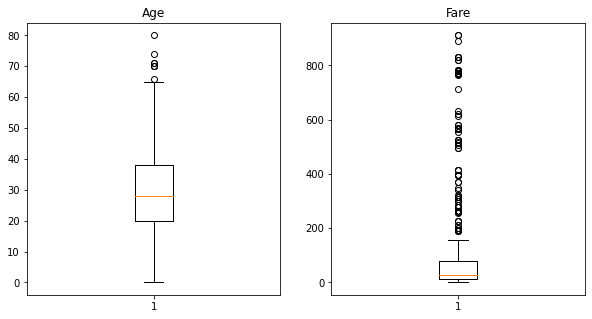

Number of outliers detected: 23


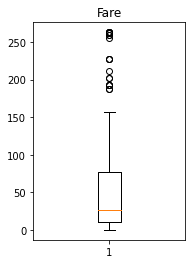

         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  622.000000  622.000000  622.000000  622.000000  622.000000  622.000000   
mean     0.369775    2.361736    1.350482   28.929260    0.472669    0.387460   
std      0.483132    0.777718    0.477505   13.971497    0.876455    0.816124   
min      0.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000    1.000000   20.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    2.000000   36.000000    1.000000    0.000000   
max      1.000000    3.000000    2.000000   80.000000    5.000000    6.000000   

             Fare  
count  622.000000  
mean    45.853759  
std     50.416106  
min      0.000000  
25%     10.500000  
50%     26.000000  
75%     77.396000  
max    262.875000  


In [ ]:
# converting sex value from categorical to numerical value to plot it easily
data['Sex'] = data['Sex'].apply(lambda s: 1 if s == "male" else 2)

# find how much data is missing
print(data.isnull().sum())

# eliminate rows containing null data
data = data.dropna()

# eliminate rows containing 0 values
# data = data[(data != 0).all(1)]

print(data.isnull().sum())


# data = data.dropna(inplace=False)
# print(data)

# plot some key values to find outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(data['Age'])
plt.title('Age')

plt.subplot(1, 2, 2)
plt.boxplot(data['Fare'])
plt.title('Fare')

plt.show()

z_scores = np.abs(stats.zscore(data['Fare']))
threshold = 3
outliers = np.where(z_scores > threshold)[0]
print("Number of outliers detected:", len(outliers))

# remove values above 85th percentile in Fare
data = data[data['Fare'] < data['Fare'].quantile(0.90)]

plt.subplot(1, 2, 2)
plt.boxplot(data['Fare'])
plt.title('Fare')

plt.show()

print(data.describe())


### Correlation

From the initial box plot, we see that the fare contains quite a few outliers. So, in order to lessen the impact of the very high values, we removed the rows above the 90th percentile.
We can now move on to finding correlations between our values.

In [ ]:

# Get the correlation matrix of the numerical columns
print(data.corr())

# find rows with correlation over 0.3
# print(data.corr().loc[(data.corr() > 0.3) & (data.corr() < 1)])

# Calculate the correlation matrix
corr_matrix = data.corr()

# fill the diagonal with nans so they don't show in the final plot
np.fill_diagonal(corr_matrix.values, np.nan)

# Filter the correlation matrix to only include values above 0.3
corr_over_0_3 = corr_matrix[abs(corr_matrix) > 0.3]

# Extract the names of the columns that meet the criteria
columns_over_0_3 = corr_over_0_3.columns[corr_over_0_3.sum() > 0]

# Print the list of columns with correlation value over 0.3
# print(columns_over_0_3)

# Calculate Pearson's correlation for each pair of columns
for column in columns_over_0_3:
    # skip the survived column
    if column == 'Survived':
        continue

    correlation = data['Survived'].corr(data[column], method='pearson')
    print("Pearson's correlation coefficient between Survived and", column, ":", correlation)



          Survived    Pclass       Sex       Age     SibSp     Parch      Fare
Survived  1.000000 -0.326566  0.526227 -0.115876 -0.014123  0.101627  0.183546
Pclass   -0.326566  1.000000 -0.120800 -0.321751  0.039333  0.037603 -0.207142
Sex       0.526227 -0.120800  1.000000 -0.148101  0.142204  0.279059  0.175028
Age      -0.115876 -0.321751 -0.148101  1.000000 -0.295646 -0.204627 -0.095526
SibSp    -0.014123  0.039333  0.142204 -0.295646  1.000000  0.398666  0.066886
Parch     0.101627  0.037603  0.279059 -0.204627  0.398666  1.000000  0.127904
Fare      0.183546 -0.207142  0.175028 -0.095526  0.066886  0.127904  1.000000
Pearson's correlation coefficient between Survived and Sex : 0.5262266947166581
Pearson's correlation coefficient between Survived and SibSp : -0.0141232467080742
Pearson's correlation coefficient between Survived and Parch : 0.1016273931081233


### Correlation analysis

Pearson's correlation test tells us there is a non-negligible positive correlation between Sex and survival.
Whereas we can safely assume that SibSp and Parch are correlated between each other, since they exhibit a very low correlation to survival rate.

### Correlation by age

Intuitively, we might assume there is some correlation between age and survival, given that there were also children and elderly aboard.

Let's plot these values to understand their relationship.

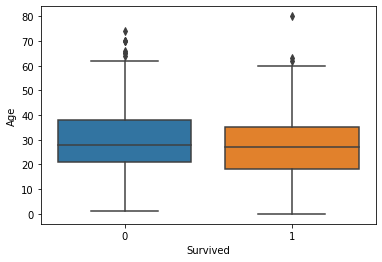

In [ ]:
# visualize the relationship between survived and age
sns.boxplot(x='Survived', y='Age', data=data)
plt.show()


### Age correlation analysis

As confirmed by our initial correlation filter pass. The correlation between age and survival is quite low. Indeed both box plots are approximately the same size and do not vary much based on the age.

### Correlation by sex

Pearson's correlation test, does however indicate some positive correlation between Sex and survival. Let's observe this relationship with a stacked bar chart.
Based on the chart, it seems there were more men than women aboard. To clarify our understanding, we can calculate the percentage of men who survived, compared to the percentage of women who survived.

Women aboard: 218
Men aboard: 404
Survived          0          1
Sex                           
1         81.683168  18.316832
2         28.440367  71.559633


Text(0, 0.5, 'Number of Passengers')

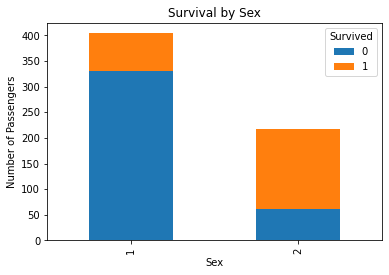

In [ ]:
# Group the data by sex and survived columns and count the number of occurrences
grouped_data = data.groupby(['Sex', 'Survived']).size().unstack()

num_women = data[data['Sex'] == 2]['Sex'].count()
num_men = data[data['Sex'] == 1]['Sex'].count()

print("Women aboard: " + str(num_women))
print("Men aboard: " + str(num_men))

percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

print(percentages)

# Create a stacked bar chart
grouped_data.plot(kind='bar', stacked=True)

# Add labels and title to the chart
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')

### Sex correlation analysis

The bar chart confirms there were nearly twice as many men as there was women aboard. Even without calculating the percentage, we see that a larger fraction of women survived compared to the women.

83% of women survived, compared to 16% for the men.

### Conclusion

After conducting an exploratory data analysis of this dataset, several key findings have been identified. Firstly, there appears to be a moderate positive correlation between Sex and Survival, with a Pearson correlation coefficient of 0.5.
This indicates that changes in Sex are associated with survival outcome.

Secondly, there are several outliers in the Fare values that appear to be extreme values and may warrant some more exploration.

Finally, there is a noticeable difference in the survival rate between men and women, with 83% of women in the dataset surviving compared to only 16% of men. Based on my history knowledge I would assume a part of this statistic is due to the crew dying and being composed of men.

Overall, these findings suggest that Sex may be an important predictor of the passenger's survival. Further analysis is recommended to better understand the outliers in Fare and to investigate potential factors that may be driving the difference in survival rate between men and women.

This EDA has provided valuable insights into the dataset and can serve as a basis for further statistical analysis and modeling.

## 2. Classification (Lecture 3 & 4)

Combine the exercise from Lecture 3 with exercise 2 from Lecture 4 into one, and construct some classification models to predict if a passenger would survive or not in the Titanic dataset.

* a) You should have (1) decision tree, (2) random forest, and (3) KNN. You may also vary the configuration of each model type.
* b) You should do necessary data preprocessing (e.g., missing value fill-in, and data scaling if needed for a classifier).
* c) You should also do cross-validation of your models.
* d) Plot the ROC with AUC for each model you implement.


Lecture 3 exercice :

<ipython-input-12-e1ee15aec02c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['Age'].fillna(reduced_df['Age'].mean(), inplace=True)


Model 0: max_depth=2, accuracy=0.7653631284916201
Model 1: max_depth=3, accuracy=0.8044692737430168
Model 2: max_depth=4, accuracy=0.770949720670391
Model 3: max_depth=5, accuracy=0.7821229050279329
Model 4: max_depth=6, accuracy=0.770949720670391


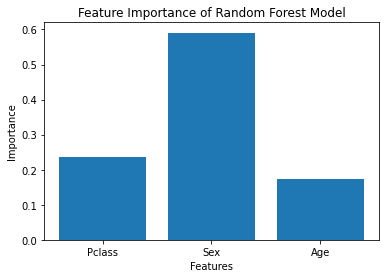

In [ ]:
# Load the Titanic dataset into a Pandas dataframe
titanic_df = pd.read_csv('titanic.csv')

# Obtain a reduced dataset D that only contains the following features: Survived, Pclass, Sex, and Age:
reduced_df = titanic_df[['Survived', 'Pclass', 'Sex', 'Age']]

# Preprocess the data by transforming categorical variables into numerical variables and imputing missing values:
reduced_df.loc[reduced_df['Sex'] == 'male', 'Sex'] = 0
reduced_df.loc[reduced_df['Sex'] == 'female', 'Sex'] = 1
reduced_df['Age'].fillna(reduced_df['Age'].mean(), inplace=True)

# Split the dataset D into training and validation/test datasets:
X = reduced_df.drop('Survived', axis=1)
y = reduced_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a decision tree model using the training dataset:
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

# Evaluate the decision tree model using the validation/test dataset:
y_pred = dt_model.predict(X_test)
accuracy_score(y_test, y_pred)

# Build multiple decision tree models with different parameters and compare their accuracies:
models = []
accuracies = []

for max_depth in [2, 3, 4, 5, 6]:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    models.append(model)
    accuracies.append(accuracy)

for i, accuracy in enumerate(accuracies):
    print(f'Model {i}: max_depth={i+2}, accuracy={accuracy}')

# Build a random forest model using the training dataset:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3)
rf_model.fit(X_train, y_train)

# Evaluate the random forest model using the validation/test dataset:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

# Plot the feature importances of the random forest model:
importances = rf_model.feature_importances_
features = X.columns

plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance of Random Forest Model')
plt.show()

### Features Importance

Here we can see which features have more importance in the survival rates, Sex is the mostimportante factor followed by the class and age.

Lecture 4 exercice 2 :

In [ ]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(reduced_df.drop(['Survived'], axis=1), reduced_df['Survived'], test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting KNN to unscaled data
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
print('Accuracy without scaling:', knn_unscaled.score(X_test, y_test))

# Fitting KNN to scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
print('Accuracy with scaling:', knn_scaled.score(X_test_scaled, y_test))


Accuracy without scaling: 0.7653631284916201
Accuracy with scaling: 0.8044692737430168


### Accuracy

The printed values represent the accuracy of the KNN classifiers on the test set. The first line prints the accuracy of the KNN classifier trained on the unscaled data, while the second line prints the accuracy of the KNN classifier trained on the scaled data. The accuracy is a measure of how well the classifier is able to correctly predict the survival status of the passengers in the test set, expressed as a percentage.

An accuracy of 0.8 means that the classifier correctly predicted the survival status of 80% of the passengers in the test set.

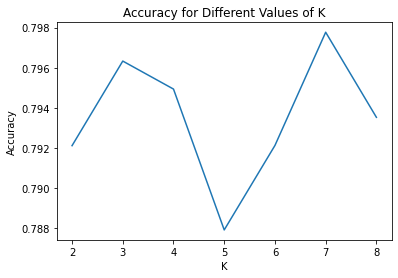

In [ ]:
# Validating different values of K using stratified 3-fold cross-validation
k_values = range(2, 9)
k_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())

# Plotting the accuracy scores for different K values
plt.plot(k_values, k_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Values of K')
plt.show()

Here we can see that the best K value for accurate predictions is 8.

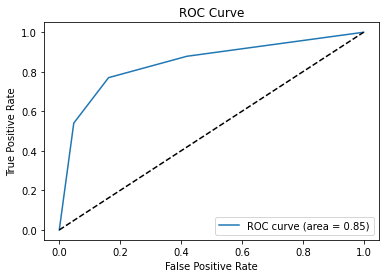

In [ ]:
# Choosing K=3 based on results of cross-validation
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predicting probabilities of class 1 (survived) for test data
y_probs = knn.predict_proba(X_test_scaled)[:, 1]

# Calculating ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plotting the ROC curve and displaying the AUC score
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Conclusion

Finally, the code plots the ROC curve and displays the AUC score in the plot legend. The diagonal line represents the ROC curve for a random classifier, while the blue curve represents the ROC curve for the KNN classifier. The closer the blue curve is to the top-left corner, the better the classifier's performance.

We can conclude to have a 80% accuracy to predict the survival rates of titanic passengers.

## 3. Regression (Lecture 6)

Train a multiple linear regression, a random forest model, and an AdaBoost model on the “boston_housing_data.csv” dataset from Lectures 5 and 6 and remember to do train-test split as well as other necessary pre-processing dataset.

### Data summary

From the kaggle dataset we can understand the attributes of the dataset (https://www.kaggle.com/datasets/altavish/boston-housing-dataset/discussion/190403):
There are 14 attributes in each case of the dataset.

They are:
*    CRIM - per capita crime rate by town
*    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*    INDUS - proportion of non-retail business acres per town.
*    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*    NOX - nitric oxides concentration (parts per 10 million)
*    RM - average number of rooms per dwelling
*    AGE - proportion of owner-occupied units built prior to 1940
*    DIS - weighted distances to five Boston employment centres
*    RAD - index of accessibility to radial highways
*    TAX - full-value property-tax rate per 10 thousand dollars
*    PTRATIO - pupil-teacher ratio by town
*    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*    LSTAT - % lower status of the population
*    MEDV - Median value of owner-occupied homes in $1000's


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    

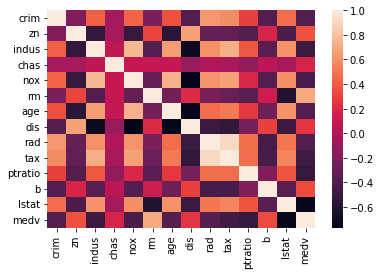

In [ ]:
# load the data boston_housing_data.csv
data = pd.read_csv("boston_housing_data.csv")

# Print the first 5 rows of the DataFrame
print(data.head())

# Get the summary statistics of the numerical columns
print(data.describe())

# Calculate the correlation matrix
corr_matrix = data.corr()

# plot the correlation matrix
sns.heatmap(corr_matrix)
plt.show()


### Data cleaning

The following output shows use there are no null values in any of the columns, there are many columns that contain zeroes. However, many of these are justified since many values represent percentages. Which also explains why certain z_scores are picked up as outliers, we can not be sure if some values are outliers or simply high percentages. However, in the spirit of obtaining accurate results, we are removing a small amount of outlier values in the criminality column.

In [ ]:
# find how much data is missing

# find how much data is missing
print(data.isnull().sum())

# count rows with 0 values
print((data == 0).sum())

# calculate zscore for data
z_scores = stats.zscore(data)
threshold = 3
outliers = np.where(z_scores > threshold)[0]
print("Number of outliers detected:", len(outliers))

# calculate the zscore for each column
# iterate over each column
for column in data.columns:
    # calculate the zscore for each column
    z_scores = stats.zscore(data[column])
    threshold = 3
    outliers = np.where(z_scores > threshold)[0]

    print("Number of outliers detected in", column, ":", len(outliers))


data = data[data["crim"] < data["crim"].quantile(0.98)]
data = data[data["crim"] > data["crim"].quantile(0.02)]

print(data.describe())


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
crim         0
zn         372
indus        0
chas       471
nox          0
rm           0
age          0
dis          0
rad          0
tax          0
ptratio      0
b            0
lstat        0
medv         0
dtype: int64
Number of outliers detected: 71
Number of outliers detected in crim : 8
Number of outliers detected in zn : 14
Number of outliers detected in indus : 0
Number of outliers detected in chas : 35
Number of outliers detected in nox : 0
Number of outliers detected in rm : 4
Number of outliers detected in age : 0
Number of outliers detected in dis : 5
Number of outliers detected in rad : 0
Number of outliers detected in tax : 0
Number of outliers detected in ptratio : 0
Number of outliers detected in b : 0
Number of outliers detected in lstat : 5
Number of outliers detected in medv

### Correlation

We find that quite a lot of values are correlated, so we bump up the correlation threshold to 0.6. And retrieve the columns that are most heavily correlated. These are the values that will be studied in our models.
We are most interested in those correlating with median value. So we double-check that these values are correlating with the "medv" column using Pearson's correlation. All columns collected are above 0.3 or below -0.3 indicating a mild positive or negative correlation. We can thus keep these values for our plots.

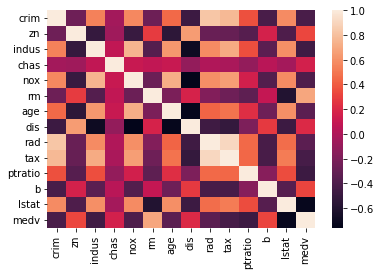

Pearson's correlation coefficient between medv and crim : -0.41767668595047897
Pearson's correlation coefficient between medv and zn : 0.32360490015441146
Pearson's correlation coefficient between medv and indus : -0.4561304968009505
Pearson's correlation coefficient between medv and nox : -0.3970102801913163
Pearson's correlation coefficient between medv and rm : 0.6843487938495025
Pearson's correlation coefficient between medv and age : -0.3427824276199137
Pearson's correlation coefficient between medv and rad : -0.3413479939431155
Pearson's correlation coefficient between medv and tax : -0.4331670950304608
Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'rad', 'tax'], dtype='object')


In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# plot the correlation matrix
sns.heatmap(corr_matrix)
plt.show()

# Show most correlated columns

# fill the diagonal with nans so they don't show in the final plot
np.fill_diagonal(corr_matrix.values, np.nan)

corr_threshold = 0.6

# Filter the correlation matrix to only include values above corr_threshold
correlations = corr_matrix[abs(corr_matrix) >= corr_threshold]

# Extract the names of the columns that meet the criteria
correlated_cols = correlations.columns[correlations.sum() > 0]


# Calculate Pearson's correlation for each pair of columns
for column in correlated_cols:
    # skip the median value
    if column == 'medv':
        continue

    correlation = data['medv'].corr(data[column], method='pearson')
    # 0 uncorrelated: 1 correlated
    print("Pearson's correlation coefficient between medv and", column, ":", correlation)

# Print the list of columns with correlation value over corr_threshold
print(correlated_cols)

### Correlation plotting

Some scatter plots, showing that there is indeed correlation between the detected columns and the median value (hereby referred to as MV).
*    Low criminality rates will drive up the MV
*    The proportion of residential land owned, will also to some degree, influence the MV
*    A low proportion of industrial businesses lead to higher MVs
*    Nitric oxide concentration will influence the MV
*    The amount of rooms per dwelling is a clear correlation. We can also discern the average amount of rooms to be around 6-7, correlated to the average MV
*    Older properties will cost less
*    Access to highways will to some extent influence the MV as well, although the data seems a bit unclear
*    Finally the a lower tax will make for a higher MV

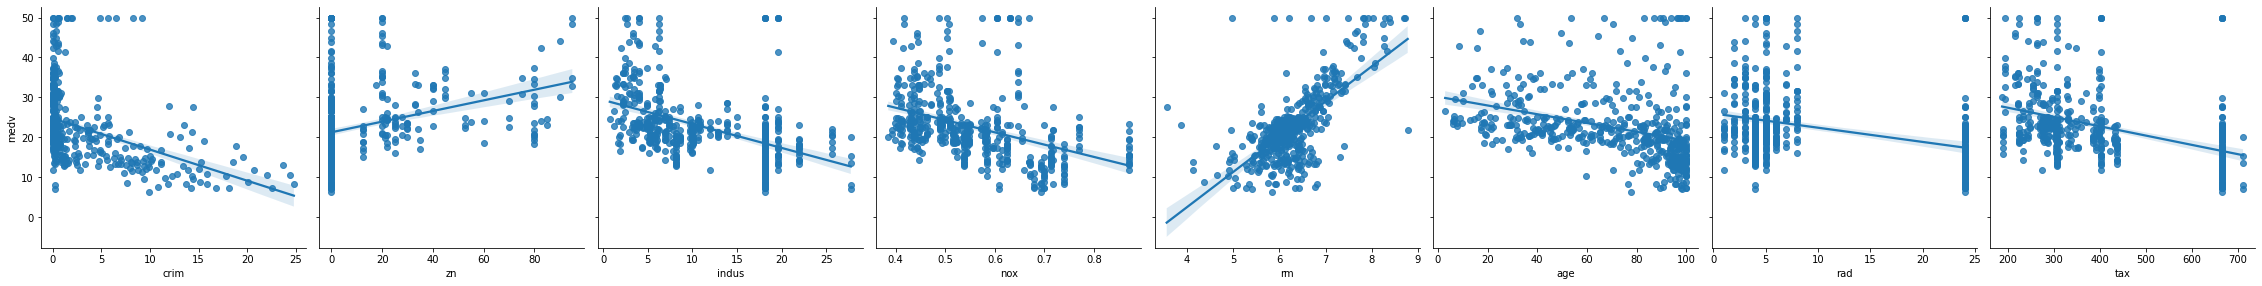

In [ ]:
# scatter plot multiple columns to see correlation
sns.pairplot(data, x_vars=['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'rad', 'tax'], y_vars='medv', height=4, aspect=1, kind='reg')
plt.show()


### Multiple linear regression

In [ ]:
# multiple linear regression
# create X and y
feature_cols = correlated_cols

# convert rad to dummies
rad_dummies = pd.get_dummies(data['rad'], prefix='rad')
reg_data = pd.concat([data, rad_dummies], axis=1)
# drop rad column
reg_data = reg_data.drop('rad', axis=1)

# remove rad from feature_cols
feature_cols = feature_cols.drop('rad')
# add rad_dummies to features
feature_cols = feature_cols.append(rad_dummies.columns)

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(reg_data[feature_cols], reg_data['medv'], test_size=0.2, random_state=1)


In [ ]:

# instantiate and fit
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

### Evaluating Multiple Linear Regression Model

From the plot, we see the model produces a degree of accuracy, but there are still many values that lie far beyond the ground truth, especially approaching the high and low values.

The coefficents show us how much the medv value is expected to change when modifying the specified feature by one unit, keeping the other units constant. We find that the nitric oxide concentration and rooms per dwelling value are most impacting.
The squared error around 4.7 (scaled up to 4.7 thousand dollars) indicates our model is somewhat accurate but has room for improvement.
This is confirmed by the R2 score of around 0.65, meaning the model was able to fit the data relatively well.

[('crim', -0.3729833015626236), ('zn', 0.04166221096651451), ('indus', 0.03566911534452668), ('nox', -6.852608189145952), ('rm', 6.52590564453615), ('age', -0.012192080931038698), ('tax', -0.014913005740874556), ('rad_1', -4.907956418559413), ('rad_2', -0.8935141791768629), ('rad_3', 0.6986523615036794), ('rad_4', -1.75549555977862), ('rad_5', 2.0614074888351173), ('rad_6', -1.69123611389669), ('rad_7', -1.7367520145010047), ('rad_8', 2.662570372288004), ('rad_24', 5.562324063285749)]
RMSE:  4.741425248984096
R2 score:  0.6560464484453871


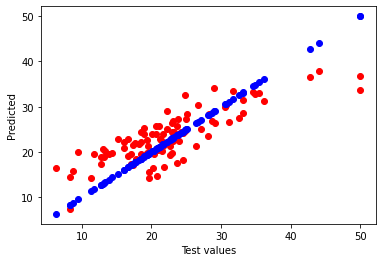

In [ ]:
# evaluate model

# print("Coefficient: ", lm.coef_)

# zip coefficients with feature names
coefficients = list(zip(feature_cols, lm.coef_))
print(coefficients)

# get a prediction
y_pred = lm.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score: ", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, color='red')
plt.scatter(y_test, y_test, color='blue')

# # compare prediction to actual
# colour prediction in orange, and actual in blue
# plt.scatter(y_test, y_pred)
plt.xlabel("Test values")
plt.ylabel("Predicted")
plt.show()


###Random forest

In [ ]:
# instantiate random forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

### Evaluating Random Forest

Here, from the plot alone we see an increased accuracy and less falloff for the low and high values.

The RMSE value confirms our visual interpretation, from 4.7 (thousand dollars!) down to ~3. Still substantial, but more acceptable.

The R2 score also shows significant improvement, the random forest found better ways to fit our data to the median value.


RMSE:  2.9458479884634294
R2 score:  0.8672291769936843


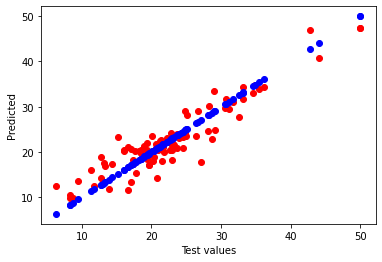

In [ ]:
# get a prediction
y_pred = rf.predict(X_test)

# print the RMSE/R2
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score: ", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, color='red')
plt.scatter(y_test, y_test, color='blue')

# # compare prediction to actual
# colour prediction in orange, and actual in blue
# plt.scatter(y_test, y_pred)
plt.xlabel("Test values")
plt.ylabel("Predicted")
plt.show()

### Adaboost

In [ ]:
# instantiate adaboost
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)


AdaBoostRegressor()

### Evaluating Adaboost

Finally, with the Adaboost regressor, the plot shows some relatively accurate predictions. Following closely enough with the ground truth. But a small falloff can be observed compared to the random forest.

The RMSE and R2 values (3.5 and 0.8, respectively) also show a slight decline, still more optimal than the Multiple Linear Regression model, but less accurate than the Random Forest.

RMSE:  3.522311720699043
R2 score:  0.8101819280153114


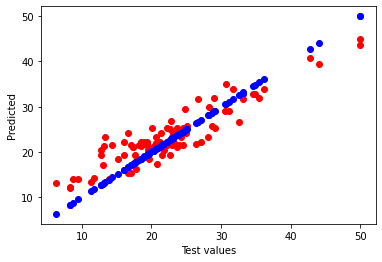

In [ ]:
# get a prediction
y_pred = ada.predict(X_test)

# print the RMSE/R2
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score: ", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, color='red')
plt.scatter(y_test, y_test, color='blue')

# # compare prediction to actual
plt.xlabel("Test values")
plt.ylabel("Predicted")
plt.show()

### Conclusion

Based on our analysis of the Boston housing dataset, it seems that linear regression is not a great model for predicting housing prices in this dataset. This is likely because the relationship between the independent variables and the median value is not strictly linear. Perhaps the amount of independant variables was too large.

Random forest, on the other hand, performed very well in predicting housing prices. This is likely because it is able to capture non-linear relationships between the variables and the target.

Adaboost, which falls in the middle of the performance range, is a boosting algorithm that iteratively improves the performance of a weak learner by focusing on the misclassified samples in the previous iterations. It can be effective for datasets with complex relationships between variables.

Overall, our findings suggest that random forest is a strong choice for predicting housing prices in the Boston housing dataset, and adaboost could be a useful alternative. It is important to note, however, that the choice of model depends on the specific goals of the analysis and the nature of the dataset, so it is important to carefully consider all options and evaluate their performance on multiple metrics.

Some more attention could be spent on selecting the important metrics and columns, some more in-depth data understanding and cleaning. And maybe we might see a slight increase in performance.

## 4. Clustering (Lecture 7 & 8)

Exercise 2 (both 2.1 and 2.2) from Lecture 7 and exercise 1 from Lecture 8.

Exercice 2.1 - Lecture 7 :

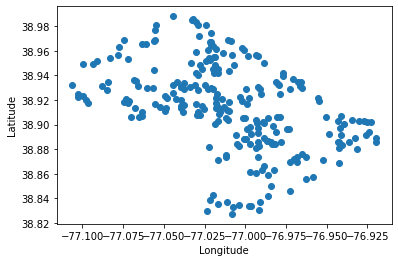

In [ ]:
# Load data from file
bike_data = pd.read_csv("Ch5_bike_station_locations.csv")

# Plot data points
plt.scatter(bike_data["longitude"], bike_data["latitude"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Plotting

Here we can see the plot for all the bike stations in Coppenhagen

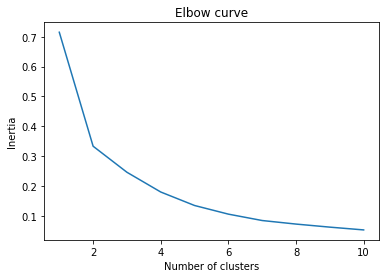

In [ ]:
# Apply K-means clustering for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(bike_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia)
plt.title("Elbow curve")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

### Clusters

The optimal number of clusters is typically chosen at the elbow point on the curve.
Here we can see that the optimal number of cluster would be around 3.

Exercice 2.2 - Lecture 7 :

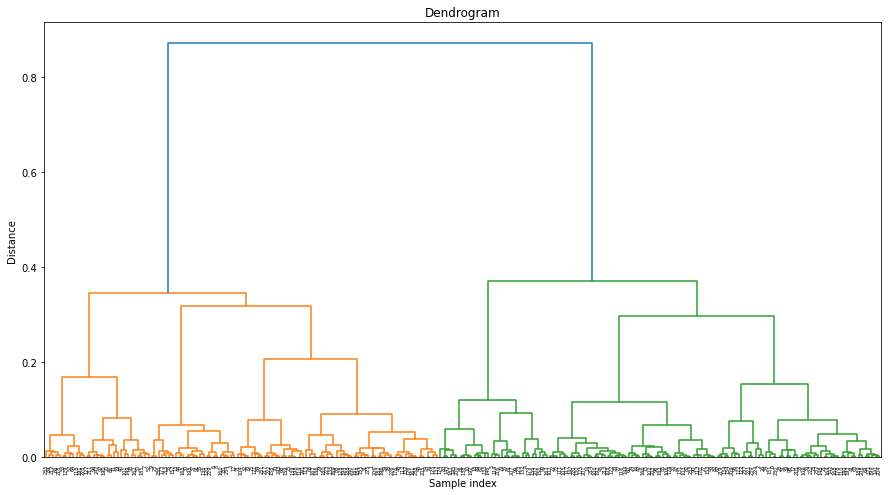

In [ ]:
# Apply agglomerative clustering with linkage=ward
Z = linkage(bike_data, method="ward")

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z, truncate_mode='level', p=10)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

The dendrogram helps us see the structure of the data and identifying natural clusters based on the distance between data points.

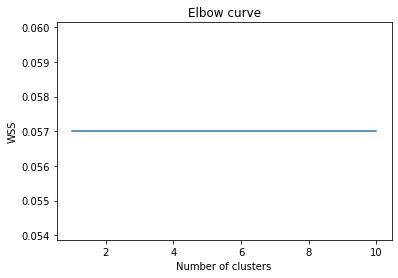

In [ ]:
# Compute WSS for different values of k
wss = []
for k in range(1, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(bike_data)
    labels = pd.Series(agg_clustering.labels_, dtype=int)
    bike_data["label"] = labels.values
    cluster_centers = bike_data.groupby("label").mean()
    wss.append(((bike_data.set_index("label") - cluster_centers) ** 2).sum().values.sum())

# Plot WSS curve
plt.plot(range(1, 11), wss)
plt.title("Elbow curve")
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.show()

We can see thate the elbo curve is the same no matter the number of clusters

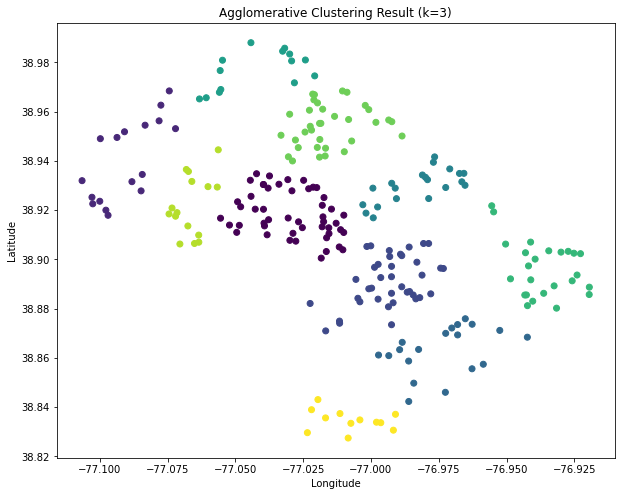

In [ ]:
# Apply agglomerative clustering with k=3 or k=4
agg_clustering = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(bike_data)
labels = pd.Series(agg_clustering.labels_, dtype=int)
bike_data["label"] = labels.values

# Visualize clustering result
plt.figure(figsize=(10, 8))
plt.scatter(bike_data["longitude"], bike_data["latitude"], c=bike_data["label"], cmap="viridis")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Agglomerative Clustering Result (k=3)")
plt.show()

### Conclusion

All points within the cluster are connected.
We can see all different clusters.
The visualization can be useful for identifying any spatial patterns or clusters in the data, and for evaluating the performance of the clustering algorithm.

We can compare this representation with the first simple plotting of the data to better visualize the different cluster formation.

Exerice 1 - Lecture 8 :

In [ ]:
# Load data from file
df = pd.read_csv("Ch5_bike_station_locations.csv")
X = df.values

In [ ]:
def apply_DBSCAN(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    # Calculate the Silhouette score
    score = silhouette_score(X, labels)

    return labels, score

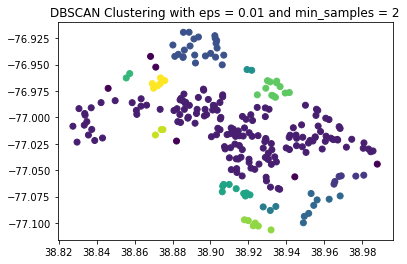

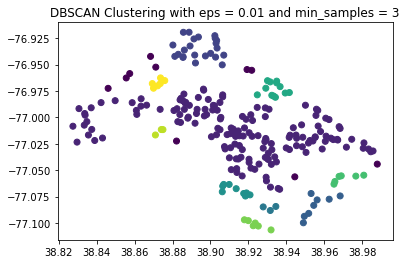

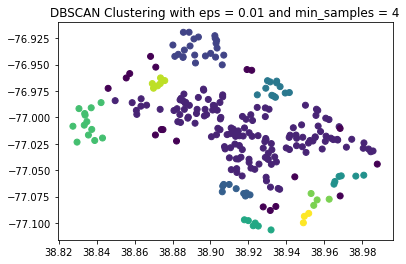

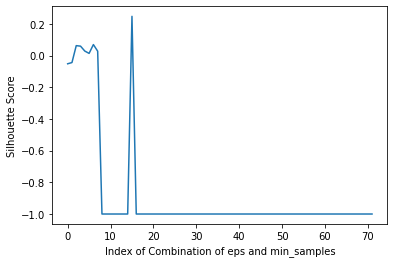

In [ ]:
def apply_DBSCAN(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    # Check if there is more than one cluster
    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
    else:
        score = -1

    return labels, score

# Define a range of values for eps and min_samples
eps_range = np.arange(0.01, 0.1, 0.01)
min_samples_range = range(2, 10)

# Initialize lists to store the results
labels_list = []
score_list = []

# Apply DBSCAN clustering and calculate Silhouette score for each combination of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        labels, score = apply_DBSCAN(X, eps, min_samples)
        labels_list.append(labels)
        score_list.append(score)

# Create a scatter plot of the data points, colored by cluster label
for i, labels in enumerate(labels_list):
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.title('DBSCAN Clustering with eps = {} and min_samples = {}'.format(eps_range[i // len(min_samples_range)], min_samples_range[i % len(min_samples_range)]))
    plt.show()

    # stops after 3 iterations (prevent printing too many plots)
    if i == 2:
        break

# Create a line plot of the Silhouette scores for each combination of eps and min_samples
plt.figure()
plt.plot(score_list)
plt.xlabel('Index of Combination of eps and min_samples')
plt.ylabel('Silhouette Score')
plt.show()

## 5. Key-value stores (Lecture 9)

Exercise 1 from Lecture 9.

In [ ]:

def etl(filename):
    try:
        # Check if the source file exists
        if not os.path.exists(filename):
            raise FileNotFoundError(f"{filename} does not exist.")

        # Open the source text file
        with open(filename, 'r', encoding='utf8') as f:
            # Create a dbm storage
            with dbm.open(filename + '-dbm', 'n') as db:

                # Convert each text line into a key-value pair
                while True:
                    line = f.readline()
                    if (len(line) == 0):
                        break

                    # Get the key value separated by a space
                    key, value = line.split(' ', 1)
                    # Set the key value pair in the dbm storage
                    db[key] = value

    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print("An error occurred:", e)

### Convert file to dbm database

Convert the data into a dbm database with the original IDs as the keys and their corresponding hashtags as values

In [ ]:
etl('ID-Hashtag')

Let's check that we did this correctly, by opening the database. And printing the key-value pairs. Our keys should be ids, and our values should be hashtags.

In [ ]:
db = dbm.open('ID-Hashtag-dbm', 'w')

In [ ]:
# zip the first 10 keys and values into a tuple array
# keyValuePairs = list(zip(db.keys()[:10], db.values()[:10]))

i = 0
maxI = 10

# print the tuple array
for key in db.keys():
    if (i >= 10):
      break
    print(key, db[key])
    i += 1

b'1020210700973559809' b'#SFFF18\n'
b'1020212539634970624' b'#healthcare #eluta\n'
b'1020217732212588544' b'#PS4share\n'
b'1020218966629933056' b'#LoveIsland\n'
b'1020220589007613958' b'#MembersGetIt #RewardsPoints #FindYourRoute #MRpoints\n'
b'1020221038380998659' b'#MinYoongi #SUGA\n'
b'1020221922704003072' b'#Echobox\n'
b'1020226829125181442' b'#NoCofidenceMotion #BhookampAaneWalaHai\n'
b'1020232153492336642' b'#equiparlab #somenterevenda #produtoslaboratoriais #produtoshospitalares #subdealers\n'
b'1020233477533421568' b'#Aspiration #Collaboration #Excellence\n'


### Second dbm database

On top of the dbm database, create another dbm database such that
* Each distinct hashtag is a key
* Each key’s value is the frequency (count) of the hashtag in the first dbm database

In [ ]:
uniqueHashTags = {}

for key in db.keys():

    #loop over the values and add them into the dict

    # if hashtag is not in the dictionary, add it
    if db[key] not in uniqueHashTags:
        uniqueHashTags[db[key]] = 1
    # if hashtag is in the dictionary, increment the count
    else:
        uniqueHashTags[db[key]] += 1

# print the first 10 items in the dictionary
i = 0
maxI = 10

for key, value in uniqueHashTags.items():
    if (i >= 10):
        break
    print(key, value)
    i += 1

b'#SFFF18\n' 3
b'#healthcare #eluta\n' 1
b'#PS4share\n' 72
b'#LoveIsland\n' 62
b'#MembersGetIt #RewardsPoints #FindYourRoute #MRpoints\n' 4
b'#MinYoongi #SUGA\n' 1
b'#Echobox\n' 133
b'#NoCofidenceMotion #BhookampAaneWalaHai\n' 9
b'#equiparlab #somenterevenda #produtoslaboratoriais #produtoshospitalares #subdealers\n' 1
b'#Aspiration #Collaboration #Excellence\n' 1


In [ ]:
filename = "Hashtag-Count"

# create a new dbm database
with dbm.open(filename + '-dbm', 'n') as db:
    for key, value in uniqueHashTags.items():
        db[key] = str(value)

### Return the top-10 frequent hashtags

Lets use python's "sorted" function and apply it to our dictionary of items. We pass a lambda function to apply the sorting to the second parameter of our key-value pairs (i.e. the number of hashtags). Finally we reverse the list in order to have it in descendant order.
Once we obtain the list, we can use python array comprehension to obtain the first 10 elements.

In [ ]:
# get the top-10 hashtags
top10 = sorted(uniqueHashTags.items(), key=lambda x: x[1], reverse=True)[:10]

print(top10)

[(b'#\n', 8755), (b'#TreCru\n', 2326), (b'# #\n', 1802), (b'#NoConfidenceMotion\n', 1415), (b'# # #\n', 1007), (b'#TheGreatSeungri\n', 916), (b'#AlexandreBenalla\n', 462), (b'#peing #\n', 460), (b'#1\n', 376), (b'#Benalla\n', 356)]


## 6. Deep learning (Lecture 10)

Train a deep neural network to predict if a passenger would survive or not in the Titanic dataset and remember to do train-test split as well as other necessary pre-processing dataset.

In [ ]:
# load the dataset
data = pd.read_csv('titanic.csv')

# pre-process the data
X = data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']
X['Age'].fillna(X['Age'].mean(), inplace=True)
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Evaluate the model on the testing set
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
40/40 [==============================] - 3s 22ms/step - loss: 0.7549 - accuracy: 0.5031 - val_loss: 0.6332 - val_accuracy: 0.8472
Epoch 2/50
40/40 [==============================] - 0s 5ms/step - loss: 0.7166 - accuracy: 0.5688 - val_loss: 0.5784 - val_accuracy: 0.8611
Epoch 3/50
40/40 [==============================] - 0s 5ms/step - loss: 0.6329 - accuracy: 0.6453 - val_loss: 0.5391 - val_accuracy: 0.8611
Epoch 4/50
40/40 [==============================] - 0s 6ms/step - loss: 0.6243 - accuracy: 0.6656 - val_loss: 0.5067 - val_accuracy: 0.8750
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.6296 - accuracy: 0.6531 - val_loss: 0.4833 - val_accuracy: 0.9167
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 0.5804 - accuracy: 0.7063 - val_loss: 0.4619 - val_accuracy: 0.9167
Epoch 7/50
40/40 [==============================] - 0s 8ms/step - loss: 0.5837 - accuracy: 0.7125 - val_loss: 0.4434 - val_accuracy: 0.9167
Epoch 8/50
40/40 [=

### Model Training

The model is defined using the Sequential class, which allows us to create a feedforward neural network by stacking layers. The model has three layers, with the first two being dense layers with 32 and 16 neurons respectively and using the ReLU activation function. Dropout layers are added after each dense layer to prevent overfitting. The last layer is a single neuron with a sigmoid activation function, which outputs a probability of survival.

The model is then compiled with the Adam optimizer and binary cross-entropy loss function. It is trained on the training set using the fit method, with a batch size of 16 and 50 epochs. The history of the training process is saved in the history variable.

### Conclusion

Finally, the model is evaluated on the testing set using the evaluate method.

We can see that we have an accuracy of 80% with our model training.

## 7. MapReduce (Lecture 13)

All exercises from Lecture 13.

In [ ]:
from multiprocessing import Pool
# import StringLengthMR as slmr
import HashtagCountMR as htcmr
import time

lines = open('ID-Hashtag').readlines()

print("Centralized MR algorithms:")
%time htcmr.getOccurencesMR(lines)
print()

print('Parallelized MR algorithms with one process:')
%time htcmr.getFrequentMR_chunked(lines)
print()

pool = Pool()

print('Parallelized MR algorithms with different numbers of chunks:')
%time htcmr.getFrequentMR_chunked_mp(lines, 30, pool)
# Let's make more chunks
%time htcmr.getFrequentMR_chunked_mp(lines, 50, pool)
%time htcmr.getFrequentMR_chunked_mp(lines, 100, pool)
%time htcmr.getFrequentMR_chunked_mp(lines, 200, pool)

res = htcmr.getOccurencesMR(lines)
with open("ID-Hashtag-Count", "w") as f:
    for hashtag, count in res.items():
        f.write(f"{hashtag}: {count}\n")

print("Hashtag sorting")
%time htcmr.chunkedHashtagSorter(list(res.items()), 30, pool)
%time htcmr.chunkedHashtagSorter(list(res.items()), 50, pool)
%time htcmr.chunkedHashtagSorter(list(res.items()), 100, pool)

sortedHashtags = htcmr.chunkedHashtagSorter(list(res.items()), 100, pool)
print(sortedHashtags)


Centralized MR algorithms:
CPU times: user 270 ms, sys: 4.65 ms, total: 275 ms
Wall time: 277 ms

Parallelized MR algorithms with one process:
CPU times: user 448 ms, sys: 101 ms, total: 548 ms
Wall time: 555 ms

Parallelized MR algorithms with different numbers of chunks:
CPU times: user 583 ms, sys: 122 ms, total: 705 ms
Wall time: 886 ms
CPU times: user 555 ms, sys: 66 ms, total: 621 ms
Wall time: 749 ms
CPU times: user 549 ms, sys: 35.5 ms, total: 585 ms
Wall time: 699 ms
CPU times: user 562 ms, sys: 38.5 ms, total: 601 ms
Wall time: 722 ms
Hashtag sorting
CPU times: user 109 ms, sys: 8.23 ms, total: 117 ms
Wall time: 134 ms
CPU times: user 91.3 ms, sys: 7.96 ms, total: 99.2 ms
Wall time: 124 ms
CPU times: user 85.6 ms, sys: 7.75 ms, total: 93.4 ms
Wall time: 106 ms
[('#NoConfidenceMotion', 3255), ('#TreCru', 2326), ('#TheGreatSeungri', 1607), ('#FridayFeeling', 1141), ('#AlexandreBenalla', 981), ('#KINGSEUNGRI_123', 819), ('#Benalla', 763), ('#RT', 685), ('#FF', 684), ('#Brexit', 

Given the nature of the task (i.e. accounting for each apparition of a specific hashtag), we decided the mapper should perform the relatively simple and efficient task of creating a list of each hashtag along with their apparition as they come, including doubles.
<br/>
Giving us a list in the following shape: [(word, count)]
<br/>
Thus the reducer is responsible for aggregating this list into a dictionary with the hashtag as the key, and the count as its value. A heavy task, offset by the possibility of chunking the data, then reassembling it and passing it to a final reducer. With many of the duplicates already removed.
<br/>
Despite this theoretical increase in efficiency, we remark that the simplest synchronous MapReduce operation is the fastest. At least when counting each individual hashtag.
<br/>
Whereas for the second part of the exercise, sorting the hashtags, we find that with a chunk size of 100 and a pooling of our CPU's resources, we efficiently sorted our hashtags into batches, finally cutting it down to a top ten most occuring hashtag. With an increase in efficiency as we increase the chunk size.

## 8. Time Series Analysis (Lecture 14 & 15)

Do a time series analysis of the Copenhagen ice cream dataset ("cph_ice_cream_searches.csv") from Lectures 14 and 15.

### Data processing

The CSV seems to contain one big column containing the actual data (Category: All categories) so a bit of processing was necessary to create an object with a series object for each ice cream data.

In [ ]:
df = pd.read_csv("cph_ice_cream_searches.csv")

print(df.head())

# print(df.columns)

df = df["Category: All categories"]

ice_cream_names = df["Month"]
ice_cream_arr = str(ice_cream_names).split("  ")

iceCreamData = {}
keys = df.keys()

indexes = []

for i in range(1, len(keys)):
  indexes.append(keys[i][0])

for idx in range(len(ice_cream_arr)):
  ice_cream = ice_cream_arr[idx]
  iceCreamData[ice_cream] = []
  for i in range(1, len(keys)):
    if (idx > 2):
      iceCreamData[ice_cream].append(int(df[keys[i]]))
    else:
      iceCreamData[ice_cream].append(int(keys[i][idx + 1]))


ismejerietSeries = pd.Series(iceCreamData[ice_cream_arr[0]], index=indexes)
paradisIsSeries = pd.Series(iceCreamData[ice_cream_arr[1]], index=indexes)
osterbergIsSeries = pd.Series(iceCreamData[ice_cream_arr[2]], index=indexes)
niceCreamSeries = pd.Series(iceCreamData[ice_cream_arr[3]], index=indexes)

iceCreamSeries = {
    "ismejeriet": ismejerietSeries,
    "paradisIs": paradisIsSeries,
    "osterbergIs": osterbergIsSeries,
    "niceCream": niceCreamSeries
}

                                                                                                                                                 Category: All categories
Month   ismejeriet: (Capital Region of Denmark) paradis is: (Capital Region of Denmark) østerberg is: (Capital Region of Denmark)  nicecream: (Capital Region of Denmark)
2013-02 0                                       13                                      0                                                                               0
2013-03 12                                      52                                      5                                                                               0
2013-04 11                                      85                                      0                                                                               0
2013-05 7                                       94                                      0                                                             

Here we create a similar object only the data has been summed for yearly data. We also take this opportunity to convert the index to a datetime so we can perform date-related operations on it later on.

In [ ]:
# convert index to datetime from string "YYYY-MM"
for series in iceCreamSeries:
    iceCreamSeries[series].index = pd.to_datetime(iceCreamSeries[series].index, format="%Y-%m")

iceCreamYearlySeries = {
    "ismejeriet": ismejerietSeries.resample("Y").sum(),
    "paradisIs": paradisIsSeries.resample("Y").sum(),
    "osterbergIs": osterbergIsSeries.resample("Y").sum(),
    "niceCream": niceCreamSeries.resample("Y").sum()
}

### Plotting

In order to visualize the seasonality, let's plot the overall values, and the changes for each series.

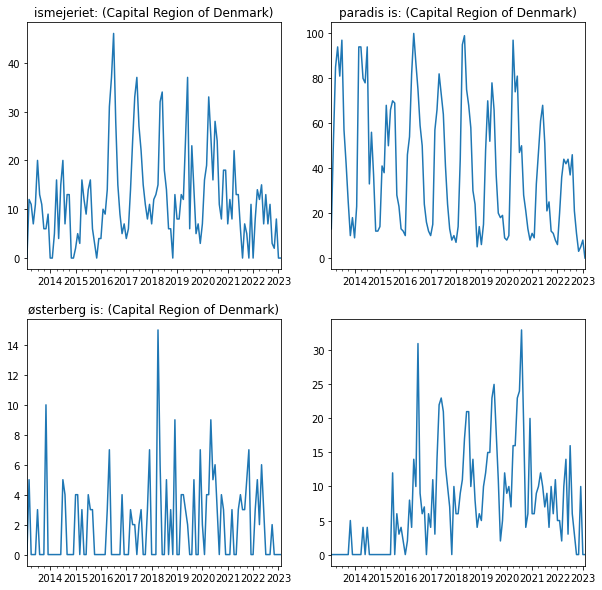

In [ ]:

# plot each series on a separate plot side by side
def plot_ice_creams(iceCreamSeries):
  global ice_cream_arr
  fig, axes = plt.subplots(2, 2, figsize=(10, 10))

  iceCreamSeries[0].plot(ax=axes[0, 0], title=ice_cream_arr[0])
  iceCreamSeries[1].plot(ax=axes[0, 1], title=ice_cream_arr[1])
  iceCreamSeries[2].plot(ax=axes[1, 0], title=ice_cream_arr[2])
  iceCreamSeries[3].plot(ax=axes[1, 1], title=ice_cream_arr[3])


plot_ice_creams([iceCreamSeries["ismejeriet"], iceCreamSeries["paradisIs"], iceCreamSeries["osterbergIs"], iceCreamSeries["niceCream"]])


Let's also create a dataframe containing all our data in separate columns in case we need to perform specific functions on them. (Such as pct_change or diff).

In [ ]:
# convert the series back into a dataframe
iceCreamDf = pd.DataFrame()

# add the other series to the dataframe
for series in iceCreamSeries:
  iceCreamDf[series] = iceCreamSeries[series]

iceCreamDf.head()

,ismejeriet,paradisIs,osterbergIs,niceCream
2013-02-01,0,13,0,0
2013-03-01,12,52,5,0
2013-04-01,11,85,0,0
2013-05-01,7,94,0,0
2013-06-01,11,81,0,0


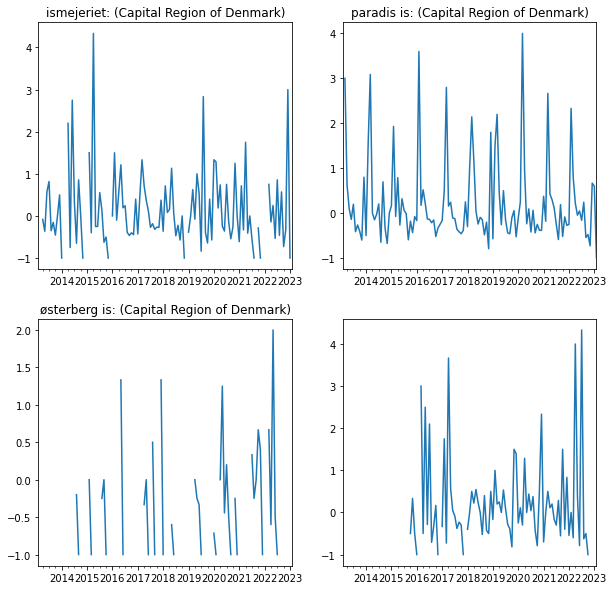

In [ ]:
plot_ice_creams([iceCreamDf["ismejeriet"].pct_change(),
                    iceCreamDf["paradisIs"].pct_change(),
                    iceCreamDf["osterbergIs"].pct_change(),
                    iceCreamDf["niceCream"].pct_change()])

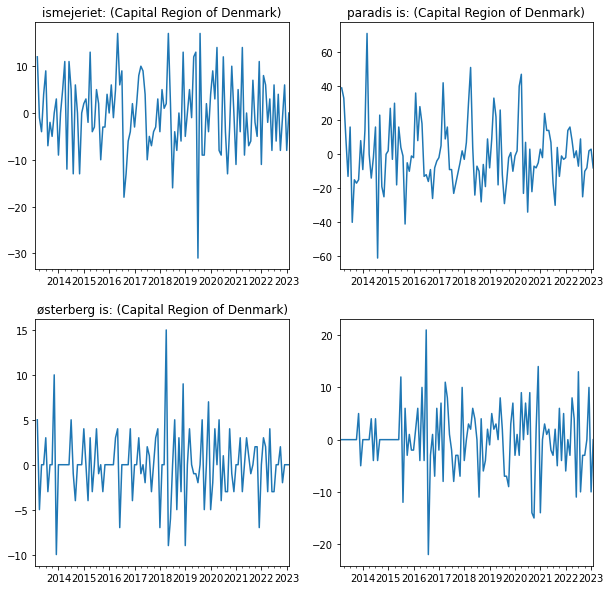

In [ ]:

plot_ice_creams([iceCreamDf["ismejeriet"].diff(),
                    iceCreamDf["paradisIs"].diff(),
                    iceCreamDf["osterbergIs"].diff(),
                    iceCreamDf["niceCream"].diff()])


### Train test split

In order to move on to prediction, let's divide our data into training and testing data.

In [ ]:
# add the other series to the dataframe
# for series in iceCreamSeries:
#   iceCreamDf[series] = iceCreamSeries[series]

iceCreamTestData = {}
iceCreamTrainData = {}

print(len(iceCreamDf))
test_data_len = 24 # approximately 20% of our total data
train_data_len = len(iceCreamDf) - test_data_len

for series in iceCreamSeries:
  iceCreamTestData[series] = iceCreamSeries[series][-test_data_len:]
  iceCreamTrainData[series] = iceCreamSeries[series][:-test_data_len]


# print(iceCreamTestData["ismejeriet"])

# flights_test = flights_series[-24:]
# print(len(flights_test))
# flights_test

121


### Moving average and rolling mean

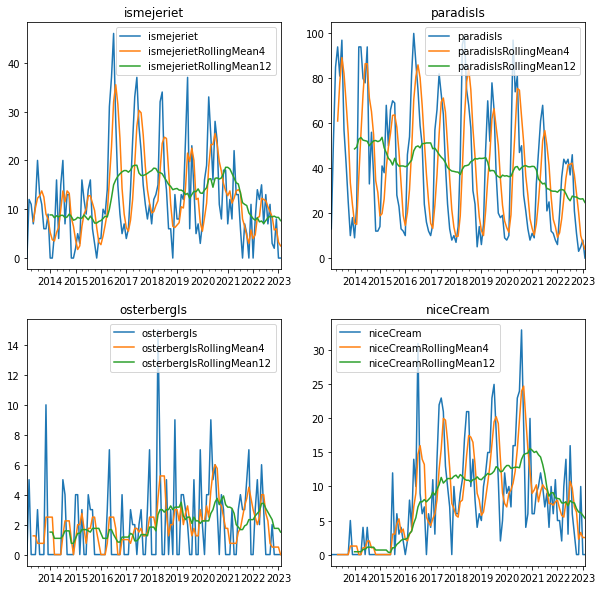

In [ ]:
# create a list of tuples, where each tuple contains the name of the icecream and its corresponding series
icecream_series = [("ismejeriet", ismejerietSeries), ("paradisIs", paradisIsSeries), ("osterbergIs", osterbergIsSeries), ("niceCream", niceCreamSeries)]

# create a dictionary to store the dataframes
dfs = {}

# loop over the list of tuples and create a dataframe for each icecream
for icecream, series in icecream_series:
    df = pd.DataFrame()
    df[icecream] = series
    df = df.join(df.rolling(4).mean(), rsuffix="RollingMean4").join(df.rolling(12).mean(), rsuffix="RollingMean12")
    dfs[icecream] = df


# plot each one on a different axis
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for (icecream, df), ax in zip(dfs.items(), axes.flatten()):
    df.plot(ax=ax, title=icecream)

In [ ]:
def predict_rolling_mean(series, window):
    return np.mean(series[-window:])

def forecast_rolling_function(series, pred_function, forecast_window):
  new_series = series
  for _ in range(forecast_window):
      new_value = pred_function(new_series)
      new_index = new_series.shift(1, freq="infer").index[-1]
      new_series = pd.concat([new_series, pd.Series([new_value], index = [new_index])])
  return new_series

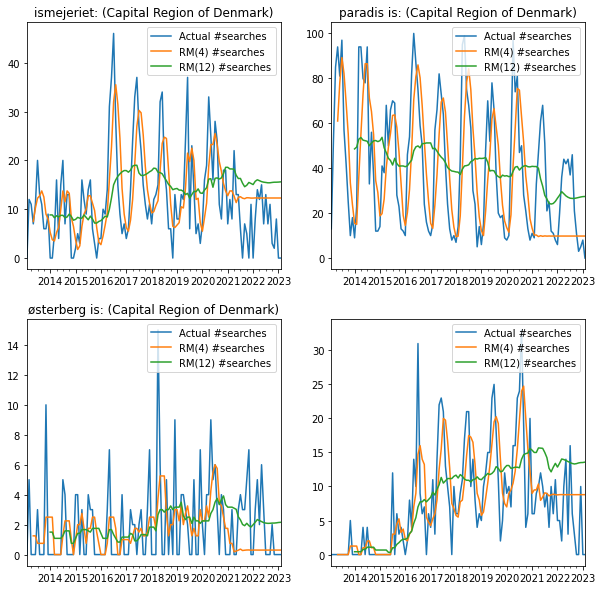

In [ ]:
# define a list of ice cream types
ice_cream_types = ["ismejeriet", "paradisIs", "osterbergIs", "niceCream"]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# loop over the ice cream types
for i, ice_cream_type in enumerate(ice_cream_types):

    # generate rolling mean forecasts for each ice cream type
    RM4_forecast = pd.Series(forecast_rolling_function(iceCreamTrainData[ice_cream_type], lambda x: predict_rolling_mean(x, 4), 24))[-24:]
    RM12_forecast = pd.Series(forecast_rolling_function(iceCreamTrainData[ice_cream_type], lambda x: predict_rolling_mean(x, 12), 24))[-24:]

    # create a dataframe for each ice cream type with actual and forecasted data
    forecast_df = pd.concat([pd.Series(pd.concat([iceCreamTrainData[ice_cream_type], iceCreamTestData[ice_cream_type]]), name="Actual #searches"),
                            pd.Series(pd.concat([iceCreamTrainData[ice_cream_type].rolling(4).mean(), RM4_forecast]), name="RM(4) #searches"),
                            pd.Series(pd.concat([iceCreamTrainData[ice_cream_type].rolling(12).mean(), RM12_forecast]), name="RM(12) #searches")],
                            axis=1)

    # plot the data for each ice cream type
    row = i // 2
    col = i % 2
    forecast_df.plot(ax=axes[row, col], title=ice_cream_arr[i])

### Exponential smoothing and decay

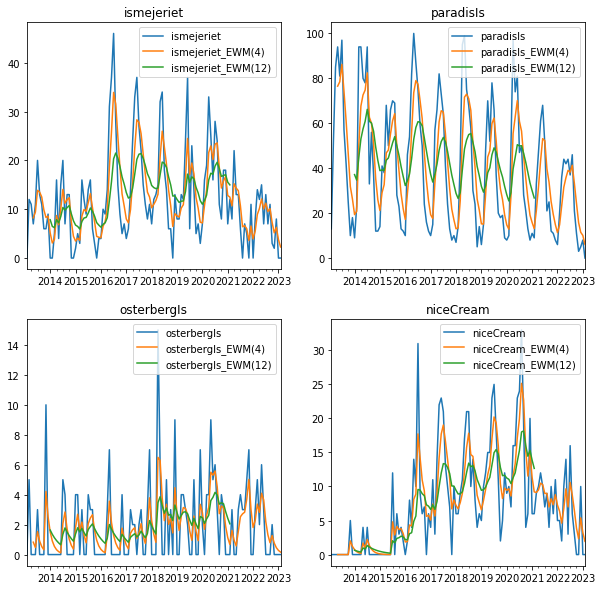

In [ ]:

dfs = {}

# loop over the list of tuples and create a dataframe for each icecream
for icecream, series in icecream_series:
    df = pd.DataFrame()
    df[icecream] = series

    df_train = pd.DataFrame()
    df_train[icecream] = iceCreamTrainData[icecream]

    df = df.join(df.ewm(span=4, min_periods=4).mean(), rsuffix="_EWM(4)").join(
      df_train.ewm(span=12, min_periods=12).mean(), rsuffix="_EWM(12)")

    dfs[icecream] = df


# plot each one on a different axis
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for (icecream, df), ax in zip(dfs.items(), axes.flatten()):
    df.plot(ax=ax, title=icecream)

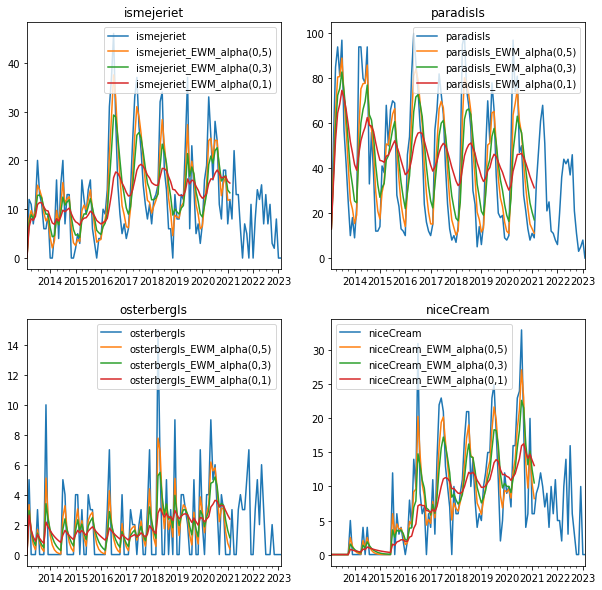

In [ ]:
dfs = {}

# loop over the list of tuples and create a dataframe for each icecream
for icecream, series in icecream_series:
    df = pd.DataFrame()
    df[icecream] = series

    df_train = pd.DataFrame()
    df_train[icecream] = iceCreamTrainData[icecream]

    df = df.join(df_train.ewm(alpha = 0.5).mean(), rsuffix="_EWM_alpha(0,5)").join(
      df_train.ewm(alpha = 0.3).mean(), rsuffix="_EWM_alpha(0,3)").join(
          df_train.ewm(alpha = 0.1).mean(), rsuffix="_EWM_alpha(0,1)")

    dfs[icecream] = df


# plot each one on a different axis
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for (icecream, df), ax in zip(dfs.items(), axes.flatten()):
    df.plot(ax=ax, title=icecream)

In [ ]:
def predict_rolling_ewm(series, alpha):
    return series.ewm(alpha = alpha).mean()[-1]

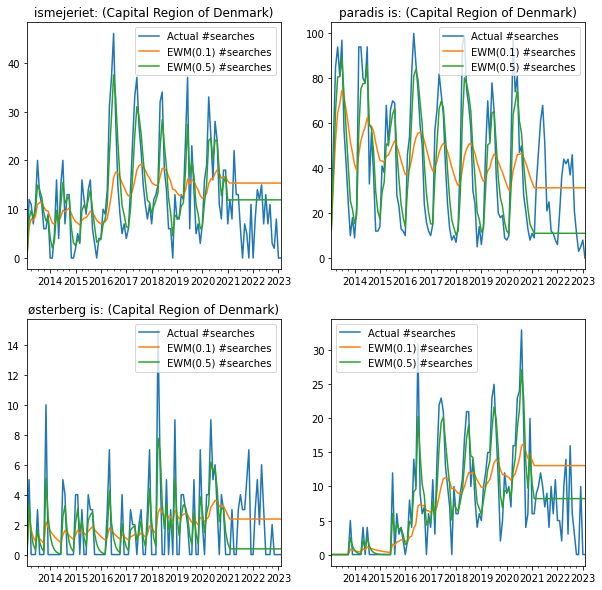

In [ ]:
# EWM01_forecast = pd.Series(forecast_rolling_function(iceCreamTrainData['ismejeriet'], lambda x: predict_rolling_ewm(x, 0.1), 24))[-24:]
# EWM05_forecast = pd.Series(forecast_rolling_function(iceCreamTrainData['ismejeriet'], lambda x: predict_rolling_ewm(x, 0.5), 24))[-24:]


# forecast_ewm_df = pd.concat([pd.Series(pd.concat([iceCreamTrainData['ismejeriet'], iceCreamTestData['ismejeriet']]), name = "Actual #searches"),
#                          pd.Series(pd.concat([iceCreamTrainData['ismejeriet'].ewm(alpha = 0.1).mean(), EWM01_forecast]), name = "EWM(0.1) #searches"),
#                          pd.Series(pd.concat([iceCreamTrainData['ismejeriet'].ewm(alpha = 0.5).mean(), EWM05_forecast]), name = "EWM(0.5) #searches")],
#                         axis=1)

# forecast_ewm_df.plot()


# define a list of ice cream types
# ice_cream_types = ["ismejeriet", "paradisIs", "osterbergIs", "niceCream"]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# loop over the ice cream types
for i, ice_cream_type in enumerate(ice_cream_types):

    # generate rolling mean forecasts for each ice cream type
    EWM01_forecast = pd.Series(forecast_rolling_function(iceCreamTrainData[ice_cream_type], lambda x: predict_rolling_ewm(x, 0.1), 24))[-24:]
    EWM05_forecast = pd.Series(forecast_rolling_function(iceCreamTrainData[ice_cream_type], lambda x: predict_rolling_ewm(x, 0.5), 24))[-24:]

    # create a dataframe for each ice cream type with actual and forecasted data
    forecast_df = pd.concat([pd.Series(pd.concat([iceCreamTrainData[ice_cream_type], iceCreamTestData[ice_cream_type]]), name="Actual #searches"),
                            pd.Series(pd.concat([iceCreamTrainData[ice_cream_type].ewm(alpha = 0.1).mean(), EWM01_forecast]), name="EWM(0.1) #searches"),
                            pd.Series(pd.concat([iceCreamTrainData[ice_cream_type].ewm(alpha = 0.5).mean(), EWM05_forecast]), name="EWM(0.5) #searches")],
                            axis=1)

    # plot the data for each ice cream type
    row = i // 2
    col = i % 2
    forecast_df.plot(ax=axes[row, col], title=ice_cream_arr[i])


### ARIMA

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
sm.tsa.stattools.adfuller(iceCreamTrainData['ismejeriet'])

print("The p-value of the Dickey-Fuller test is: {0}".format(sm.tsa.stattools.adfuller(iceCreamTrainData['ismejeriet'])[1]))

The p-value of the Dickey-Fuller test is: 0.4083257327353579


0.4 is greater than 0.05, so let's begin differencing to make the time series stationary.

PACF for ismejeriet
PACF for paradisIs
PACF for osterbergIs
PACF for niceCream


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


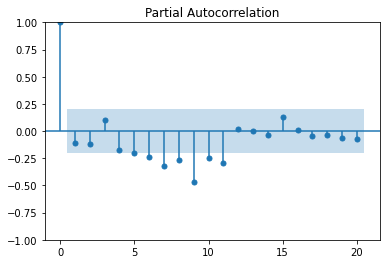

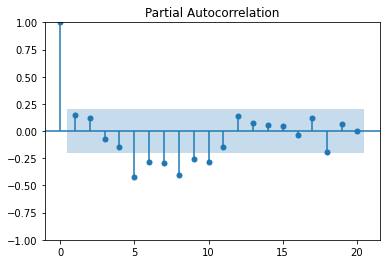

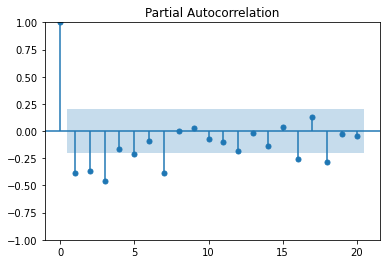

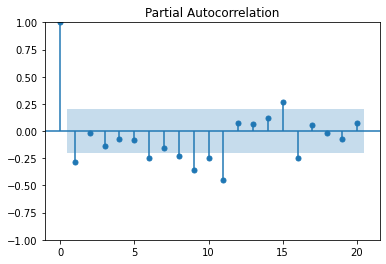

In [ ]:
diff_dfs = {}

for i, ice_cream_type in enumerate(ice_cream_types):
  diff_dfs[ice_cream_type] = iceCreamTrainData[ice_cream_type].diff().dropna()

# plot each one on a different axis
for (icecream, df), ax in zip(dfs.items(), axes.flatten()):
    print("PACF for " + icecream)
    smt.graphics.plot_pacf(diff_dfs[icecream])
    # df.plot(ax=ax, title=icecream)

ACF for ismejeriet
ACF for paradisIs
ACF for osterbergIs
ACF for niceCream


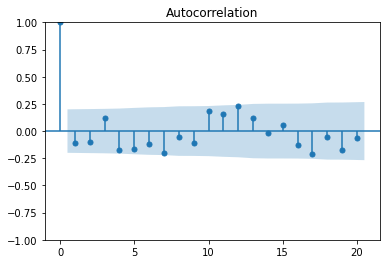

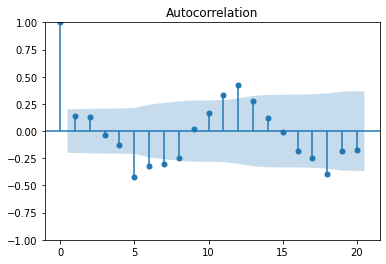

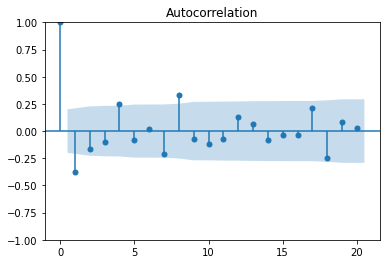

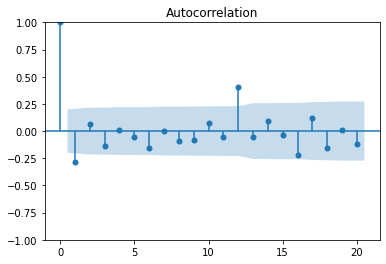

In [ ]:
diff_dfs = {}

for i, ice_cream_type in enumerate(ice_cream_types):
  diff_dfs[ice_cream_type] = iceCreamTrainData[ice_cream_type].diff().dropna()

# plot each one on a different axis
for (icecream, df), ax in zip(dfs.items(), axes.flatten()):
    print("ACF for " + icecream)
    smt.graphics.plot_acf(diff_dfs[icecream])
    # df.plot(ax=ax, title=icecream)

Not much correlation, so we can prudently choose low values for the ARIMA model.

In [ ]:
# create an arima model for each ice cream
ARIMA_models = {}
for i, ice_cream_type in enumerate(ice_cream_types):
    ARIMA_model = sm.tsa.arima.ARIMA(np.array(iceCreamTrainData[ice_cream_type]), order=(2, 1, 2))
    ARIMA_model_fit = ARIMA_model.fit()
    ARIMA_models[ice_cream_type] = ARIMA_model_fit
    print(len(ARIMA_model_fit.fittedvalues))

97


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


97
97
97


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


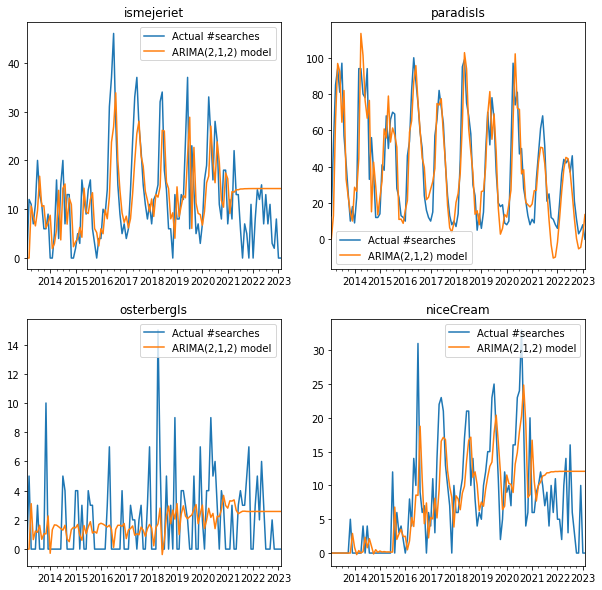

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, ice_cream_type in enumerate(ice_cream_types):

    ARIMA_fitted_n_forecast = pd.concat([pd.Series(ARIMA_models[ice_cream_type].fittedvalues, index = iceCreamTrainData[ice_cream_type].index),
                                     pd.Series(ARIMA_models[ice_cream_type].forecast(24), index = iceCreamTestData[ice_cream_type].index)])

    forecast_ARIMA_df = pd.concat([pd.Series(pd.concat([iceCreamTrainData[ice_cream_type], iceCreamTestData[ice_cream_type]]), name = "Actual #searches"),
                         pd.Series(ARIMA_fitted_n_forecast, name = "ARIMA(2,1,2) model")],
                        axis=1)

    row = i // 2
    col = i % 2
    forecast_ARIMA_df.plot(ax=axes[row, col], title=ice_cream_type)
    # forecast_df.plot(ax=axes[row, col], title=ice_cream_type)



### Conclusion

We see that our ARIMA model struggles to come up with accurate predictions. More experimentation is necessary. However, due to the difficulty in coordination generated by handling 4 datasets for every operation. The mental load of this task was greater than anticipated. Thus, for now we judge it best to move on to the rest of the exercises, and time permitting, return to this task and perform more hyperparameter tuning to obtain better results.

## 9. IoT (Lecture 17)

All exercises from Lecture 17.

In [ ]:
# load the dataset
df = pd.read_csv('diabetes.csv')

# 1. Select the following 4 attributes (3 features + 1 class label) :
#   Glucose, BloodPressure, Insulin, Outcome
df = df[['Glucose', 'BloodPressure', 'Insulin', 'Outcome']]
print(df.head())

   Glucose  BloodPressure  Insulin  Outcome
0      148             72        0        1
1       85             66        0        0
2      183             64        0        1
3       89             66       94        0
4      137             40      168        1


In [ ]:
# 2. Normalize Glucose, BloodPressure and Insulin to [0, 1] using MinMax.
scaler = MinMaxScaler()
df[['Glucose', 'BloodPressure', 'Insulin']] = scaler.fit_transform(df[['Glucose', 'BloodPressure', 'Insulin']])
print(df.head())

    Glucose  BloodPressure   Insulin  Outcome
0  0.743719       0.590164  0.000000        1
1  0.427136       0.540984  0.000000        0
2  0.919598       0.524590  0.000000        1
3  0.447236       0.540984  0.111111        0
4  0.688442       0.327869  0.198582        1


In [ ]:
# 3. Store the new data (3 normalized features + 1 class label) in another dataset S.
df.to_csv('diabetes_normalized.csv', index=False)

### Data Normalization

Here we have normalized all the data we needed from the diabetes dataset, glucose, blood pressure, insulin and their outcome.

This is the publisher

In [ ]:
# 4. Modify the MQTT example to do the following:
#  • The publisher publishes records in S continuously. When it reaches the end of S, it continues to send from the beginning again.

# We create a client as the data publisher
mqttc = mqtt.Client()
# We are connecting to port 1883 and set *keepalive* parameter to 60; *keepalive* is the maximum waiting time in seconds.
mqttc.connect("mqtt.eclipseprojects.io", 1883, 60)

# We send the following readings repeatedly. Once we reach the end, we start from the beginning again.
data = df
period = len(data)

if __name__ == "__main__":
    print("Publishing...")

    index = 0
    while (index >= 0):
        # Get the current data reading to send out
        glucose = data['Glucose'][index % period]
        bloodPressure = data['BloodPressure'][index % period]
        insulin = data['Insulin'][index % period]
        outcome = data['Outcome'][index % period]

        # Publish the data reading
        mqttc.publish("diabetesData", str(glucose) + "," + str(bloodPressure) + "," + str(insulin) + "," + str(outcome))

        # We send the next reading after 2 seconds
        # time.sleep(0.5)
        index = index + 1

Publishing...


### Publisher

*This is the subscriber it need to be run in a different notebook than the publisher to work.*

This publisher sends the normalized data in an infinite loop.

In [ ]:

#  • The subscriber continuously receives the data.

# This function defines what to do when we connect to the broker
def on_connect(client, userdata, flags, rc):
    print("Connected with result code " + str(rc))
    client.subscribe("diabetesData")

last_five_records = []
num_correct = 0
num_message = 0
stop_loop = False

# This function defines what to do when we receives a message from the broker
def on_message(client, userdata, msg):
    global num_message, num_correct, last_five_records, stop_loop
    if num_message == 1000:
        print("Number of correct classifications after 1000 messages:", num_correct)
        stop_loop = True

    # Parse the received message to get the latest record
    latest_record = msg.payload.decode("utf-8")
    num_message += 1

    # Convert the latest record to a list of floats
    latest_record = list(map(float, latest_record.split(",")))

    # Add the latest record to the last_five_records list
    last_five_records.append(latest_record)

    # Keep only the last 5 records
    last_five_records = last_five_records[-5:]

    # Check if there are 5 records in last_five_records
    if len(last_five_records) == 5:
        # Perform the 3NN classification on the last 5 records
        predicted_outcome = perform_3nn_classification(last_five_records)

        # Compare the predicted outcome with the actual outcome in the latest record
        if predicted_outcome == latest_record[-1]:
            num_correct += 1

def perform_3nn_classification(last_five_records):
    # Extract the glucose, blood pressure, and insulin values from the last 5 records
    X = [[record[0], record[1], record[2]] for record in last_five_records]

    # Extract the outcome labels from the last 5 records
    y = [record[3] for record in last_five_records]

    # Normalize the glucose, blood pressure, and insulin values using MinMax
    scaler = MinMaxScaler()
    X_norm = scaler.fit_transform(X)

    # Perform the 3NN classification using the KNeighborsClassifier from scikit-learn
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_norm, y)
    predicted_outcome = knn.predict([X_norm[-1]])

    return predicted_outcome[0]

# We create a client as the data subscriber and specify its actions for particular events
mqttc = mqtt.Client()
mqttc.on_connect = on_connect
mqttc.on_message = on_message

# Now, we connect to the data broker.
mqttc.connect("mqtt.eclipseprojects.io", 1883, 60)

# Loop forever until stop_loop is True
while not stop_loop:
    mqttc.loop()

Connected with result code 0
Number of correct classifications after 1000 messages: 781


### Subscriber

If we run the publisher in another file the subscriber will get send this output:
```
Number of correct classifications after 1000 messages: 791
```

### Conclusion

We can see that with our 3NN classification applied on the normalized data, using the last 5 received, sent from the publisher we get around 80% valid classification.